## COVID-19: Computational Drug Discovery [Model Building][Part 4]

This an attempt to find an FDA approved compound or molecule that will inhibit the function of Severe Acute Respiratory Syndrome Coronavirus 2 (SARS-CoV2).
In part 4 we will be building a random forest regressor model of replicase polyprotein 1ab inhibitors.


An Otsogile Onalepelo Project aka Morena!

### import required packages

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

### load the dataset

In [3]:
df = pd.read_csv('replicase_polyprotein_1ab_bioactivity_data_2class_pIC50_pubchem_fp.csv')

In [5]:
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.408935
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.677781
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.096910
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.801343
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.397940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.360514
106,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.906578
107,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.302771
108,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.124939


###  Input features

replicase polyprotein 1ab dataset contains 881 input features and 1 output variable (pIC50 values)

In [7]:
#drop the output variable
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
106,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
107,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
108,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Output features

In [8]:
Y = df.pIC50
Y

0      6.408935
1      6.677781
2      7.096910
3      5.801343
4      7.397940
         ...   
105    5.360514
106    5.906578
107    5.302771
108    6.124939
109    5.714443
Name: pIC50, Length: 110, dtype: float64

### Examine the data dimensions

In [9]:
X.shape

(110, 881)

X has 110 rows and 811 columns

In [10]:
Y.shape

(110,)

Y has 110 rows as well and just a single column

### Data Split (80/20 ratio) 

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [12]:
X_train.shape, Y_train.shape

((88, 881), (88,))

In [13]:
X_test.shape, Y_test.shape

((22, 881), (22,))

### Building a Regression Model using Random Forest

In [14]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.08302104538959576

In [15]:
Y_pred = model.predict(X_test)

### Scatter Plot of Experimental vs Predicted pIC50 Values

<function matplotlib.pyplot.show(*args, **kw)>

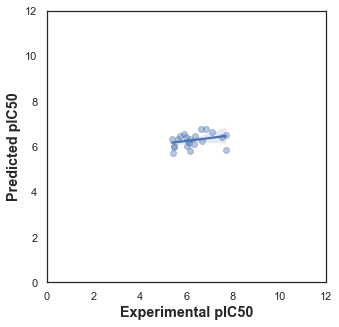

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show